## **1. Import thư viện và tạo hàm biến hóa**

In [7]:
import gc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# df = pd.read_csv("/home/windyday/DSproject/data/edited_final_dataset.csv")
df = pd.read_csv("../csv/edited_final_dataset.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        500000 non-null  int64  
 1   customerID        500000 non-null  object 
 2   first_name        500000 non-null  object 
 3   middle_name       500000 non-null  object 
 4   last_name         500000 non-null  object 
 5   age               500000 non-null  int64  
 6   account_age       500000 non-null  int64  
 7   product_category  500000 non-null  object 
 8   product_price     500000 non-null  float64
 9   ordered_quantity  500000 non-null  int64  
 10  device_used       500000 non-null  object 
 11  payment_method    500000 non-null  object 
 12  payment_amount    500000 non-null  float64
 13  device_used.1     500000 non-null  object 
 14  ip_address        500000 non-null  object 
 15  payment_hour      500000 non-null  int64  
 16  timestamp         50

In [4]:
# Renaming columns, converting data types, generating shipping addresses
def mild_transformation(main_dataframe: object) -> object:
    df_copy = main_dataframe.copy()

    df_copy = df_copy.drop(columns='Unnamed: 0')

    df_copy = df_copy.drop(columns='device_used.1')

    df_copy = df_copy.drop(columns='city')

    df_copy = df_copy.drop(columns='province')

    df_copy = df_copy.drop(columns='country')

    # Converting columns to their data types
    # Age
    bins = [float('-inf'), 0, 17, 30, 50, 100]
    labels = ['unspecified', 'under_age', 'young_adult', 'adult', 'senior']
    df_copy['age_category'] = pd.cut(df_copy['age'], bins=bins, labels=labels, right=True, ordered=True)

    # Dropping incorrect values
    df_copy.drop(df_copy[df_copy['age_category'] == 'unspecified'].index, inplace=True)
    df_copy.drop(df_copy[df_copy['age_category'] == 'under_age'].index, inplace=True)

    # Account age
    account_bins = [0, 30, 180, float('inf')]
    account_labels = ['new', 'established', 'long_term']
    df_copy['account_age_category'] = pd.cut(main_dataframe['account_age'], bins=account_bins, labels=account_labels, right=True)

    # Product category
    df_copy['product_category'] = df_copy['product_category'].astype('category')

    # Product price
    df_copy['product_price'] = df_copy['product_price'].astype('float64')

    # Ordered quantity
    df_copy['ordered_quantity'] = df_copy['ordered_quantity'].astype('int32')

    # Device used
    df_copy['device_used'] = df_copy['device_used'].astype('category')

    # Payment method
    df_copy['payment_method'] = df_copy['payment_method'].astype('category')

    # Payment amount
    df_copy['payment_amount'] = df_copy['payment_amount'].astype('float64')

    # Payment hour
    df_copy['payment_hour'] = df_copy['payment_hour'].astype('int32')

    # Payment hour
    hour_bins = [-1, 6, 12, 18, 24]
    hour_labels = ['late_night', 'morning', 'afternoon', 'evening']
    df_copy['payment_hour_category'] = pd.cut(df_copy['payment_hour'], bins=hour_bins, labels=hour_labels, right=False)

    # Timestamp
    df_copy['timestamp'] = df_copy['timestamp'].astype('datetime64[ns]')

    # Releasing memory
    del main_dataframe

    return df_copy

# Creating a summary table
def summary_table_creation(numerical_columns: list, 
                           dataframe: object) -> object:
    
    numerical_dataframe = dataframe[numerical_columns]

    summary_table = numerical_dataframe.describe().transpose()
    summary_table = summary_table.rename(columns={'50%': 'median'})
    summary_table['null_counts'] = numerical_dataframe.isnull().sum()
    summary_table['skewness'] = numerical_dataframe.skew()
    summary_table['kurtosis'] = numerical_dataframe.kurtosis()
    summary_table['cv'] = (summary_table['std'] / summary_table['mean']) * 100
    
    return summary_table

## **2. Phân loại kiểu biến**

In [8]:
df_copy = mild_transformation(df)

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477829 entries, 1 to 499999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   customerID             477829 non-null  object        
 1   first_name             477829 non-null  object        
 2   middle_name            477829 non-null  object        
 3   last_name              477829 non-null  object        
 4   age                    477829 non-null  int64         
 5   account_age            477829 non-null  int64         
 6   product_category       477829 non-null  category      
 7   product_price          477829 non-null  float64       
 8   ordered_quantity       477829 non-null  int32         
 9   device_used            477829 non-null  category      
 10  payment_method         477829 non-null  category      
 11  payment_amount         477829 non-null  float64       
 12  ip_address             477829 non-null  object   

Phân loại kiểu dữ liệu của các cột:
- "customerID", "first_name", "middle_name", "last_name", "ip_address" -> có thể không liên quan
- age: Ordinal
- account_age: Ordinal
- product_category: Nominal
- product_price: Continuous
- ordered_quantity: Discrete
- device_used: Categorical
- payment_method: Nominal
- payment_amount: Continuous
- payment_hour: Ordinal
- timestamp -> Phương pháp xử lý riêng
- billing_address: Nominal
- shipping_address: Nominal

## **3. Lập bảng thống kê sơ bộ và phân loại features**

In [ ]:
categorical_columns = ['product_category', 'device_used', 'payment_method', 'age_category', 'account_age_category', 'payment_hour_category']
numeric_columns = ['age', 'account_age', 'product_price', 'ordered_quantity', 'payment_amount', 'payment_hour']

summary_table = summary_table_creation(numeric_columns, df_copy)

summary_table.head()

,count,mean,std,min,25%,median,75%,max,null_counts,skewness,kurtosis,cv
age,477829.0,35.496217,9.081296,18.0,29.00,35.00,42.00,81.00,0,0.323397,-0.234061,25.583841
account_age,477829.0,179.838614,106.909079,1.0,86.00,180.00,273.00,365.00,0,0.013799,-1.216624,59.447233
product_price,477829.0,103.579765,159.373834,2.0,23.75,55.62,121.21,8329.90,0,7.604655,140.796655,153.865801
ordered_quantity,477829.0,2.999847,1.415235,1.0,2.00,3.00,4.00,5.00,0,0.000965,-1.301639,47.176903
payment_amount,477829.0,226.729075,269.284327,10.0,68.55,151.64,296.28,8603.95,0,5.546601,66.786537,118.769208


Age:
- Feature có dấu hiệu bị lệch phải nhẹ (skewness ~0.32)
- Dữ liệu được trải đều và hợp lý với độ tuổi thực tế (min = 18 và max = 81)
- Dù bị lệch nhẹ nhưng giá trị vẫn gần với thực tế khi phản ánh sự tập trung của một tầm (range) độ tuổi nhất định
- Không có sự xuất hiện của outlier

Account age:
- Standard deviation cho thấy dữ liệu có sự đa dạng -> Những điểm tập trung cách xa mean
- Các chỉ số tỉ lệ phần trăm và chỉ số min/max không có dấu hiệu bất thường
- Chỉ số skew thấp -> dữ liệu có sự phân tán đều về hai phía
- Chỉ số kurtosis bình thường (~-1.21) -> Độ peak vừa phải

Product price:
- Standard deviation cách xa mean và có sự chênh lệch lớn giữa min/max -> Dữ liệu đa dạng và có nhiều điểm tập trung khác nhau
- Chỉ số skew lớn (7.6046) -> Dữ liệu phân tán dày đặc về phía bên trái, thuôn dài về phía bên phải
- Chỉ số kurtosis rất cao (~138.39) -> Đỉnh nhọn, thể hiện sự tập trung dữ liệu chỉ nằm ở một số điểm cụ thể

Ordered quantity:
- Các bộ chỉ số đều bình thường
- Chỉ số kurtosis nằm ở mức hợp lý (~-1.3)

Payment amount:
- Standard deviation lớn (~269.28) so với mean (226.72) -> Dữ liệu có dải phân tán rộng
- Min và max có sự chênh lệch lớn (10 và 8603.95)
- Chỉ số skew dương cao (~5.54) -> Có xu hướng phân tán thiên về bên trái, thuôn dài về bên phải
- Chỉ số kurtosis dương cao (66.78) -> Đỉnh nhọn, thể hiện sự tập trung dữ liệu ở một số điểm cụ thể

-> Các trường cần được chuẩn hóa để cân bằng chỉ số: "product_price", "payment_amount". Việc hai trường này xuất hiện dữ liệu phân tán về một phía hoặc có nhiều điểm bị gom cụm là hoàn toàn bình thường và thực tế (độ đa dạng cao).

-> Trường "age" cần được phân tích kỹ hơn và xem xét chỉnh sửa

## **4. Visualization Data**

**1. Histogram + Box Plot (Univariate)**

In [7]:
def boxplot_drawing(dataframe: object, 
                    column_name: str, 
                    log_scale=None) -> object:
    plt.figure(figsize=(7, 4))
    plt.style.use('seaborn-v0_8-darkgrid')
    sns.boxplot(x=dataframe[column_name], 
                color= '#ED9C9C', 
                log_scale=log_scale)
    plt.title(f'Box Plot of {column_name}')
    plt.xlabel(f'Range of {column_name} ')
    plt.ylabel(f'Distribution of {column_name}')
    plt.tight_layout()
    plt.show()

def histplot_drawing(dataframe: object, 
                     column_name: str, 
                     bins='auto', 
                     log_scale=None) -> object:
    plt.figure(figsize=(8, 4))
    plt.style.use('ggplot')
    sns.histplot(data=dataframe, 
                 x=column_name, 
                 bins=bins, 
                 color='#2093DF', 
                 kde=True, 
                 log_scale=log_scale)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(f'{column_name}')
    plt.ylabel(f'Range of {column_name}')
    plt.show()

**2. Box plot**

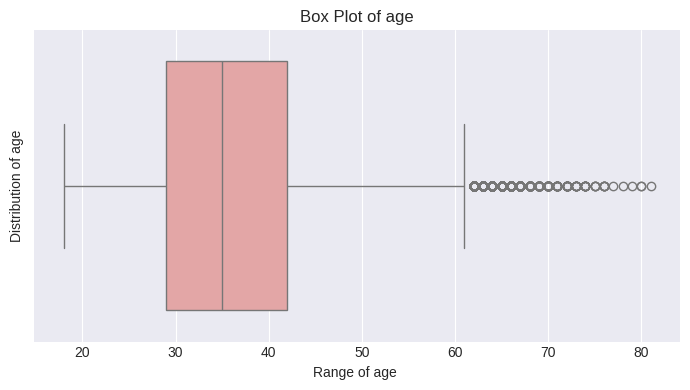

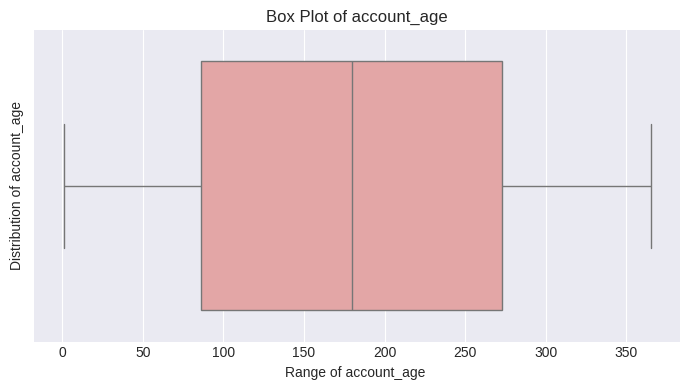

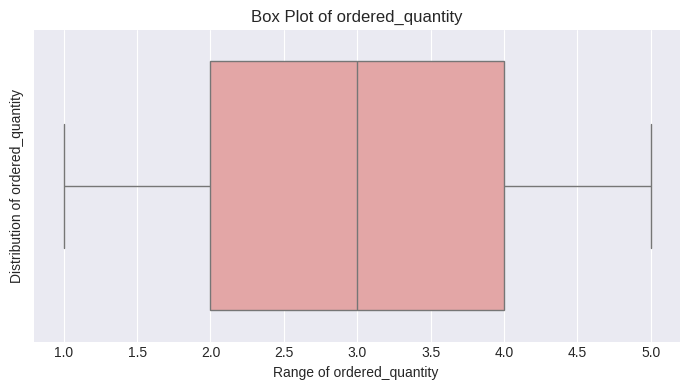

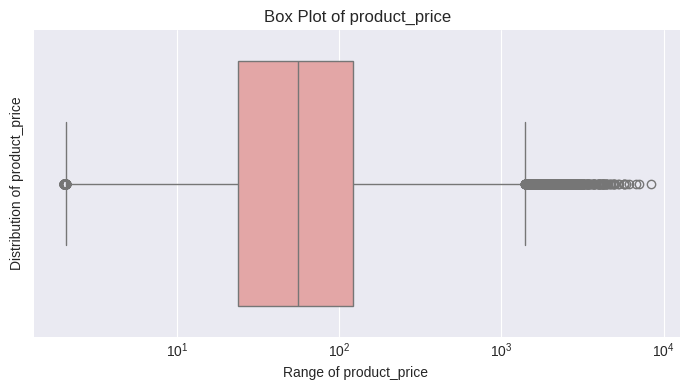

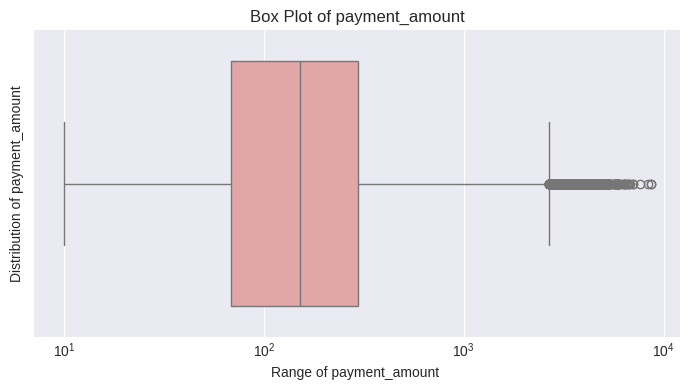

In [8]:
boxplot_drawing(df_copy, 'age')

boxplot_drawing(df_copy, 'account_age')

boxplot_drawing(df_copy, 'ordered_quantity')

boxplot_drawing(df_copy, 'product_price', log_scale=True)

boxplot_drawing(df_copy, 'payment_amount', log_scale=True)

Age:
- Biểu đồ hộp thể hiện dữ liệu có nhiều outlier dương
- Nhũng outlier nằm vào diện 60 trở lên đều có khả năng hợp lý với thực tế

Account Age:
- Độ tuổi của những tài khoản có sự tập trung trong khoảng 80 - 275 ngày
- Biểu đồ cho thấy dữ liệu được phân bố đều, khi không có dấu hiệu lệch phải hay lệch trái rõ rệt

Ordered Quantity:
- Tương tự với Account Age, biểu đồ thể hiện sự phân bố đều của dữ liệu và không có giá trị tăng hoặc giảm đột ngột
- Phần lớn số lượng hàng hóa được đặt trong một lần là 2 - 4 món

Product Price:
- Xuất hiện nhiều outlier ở cả hai đầu, nhưng không có outlier âm hoặc quá phi logic
- Mức giá phổ biến của các loại mặt hàng là nằm giữa 10 -  dưới 150 dollar (10^1 - ~10^2 khi sử dụng 'log_scale')

Payment Amount:
- Xuất hiện nhiều outlier dương phân bố gần nhau
- Không có outlier âm hoặc sai logic/lệch bối cảnh quá nhiều
- Mức thanh toán phổ biến nằm trong khoảng từ trên 50 - dưới 500 dollar (~10^2 - ~10^3 khi sử dụng 'log_scale')

**3. Histogram**

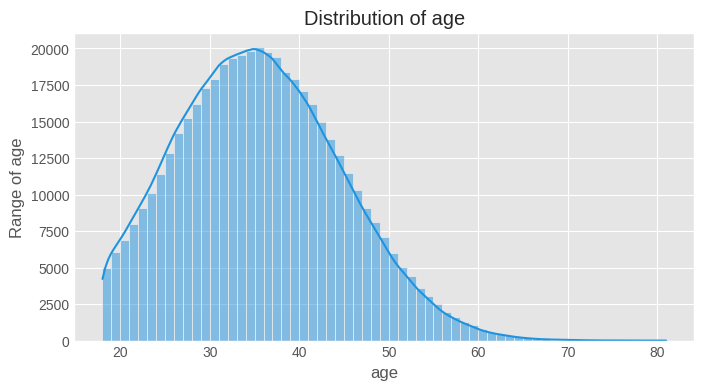

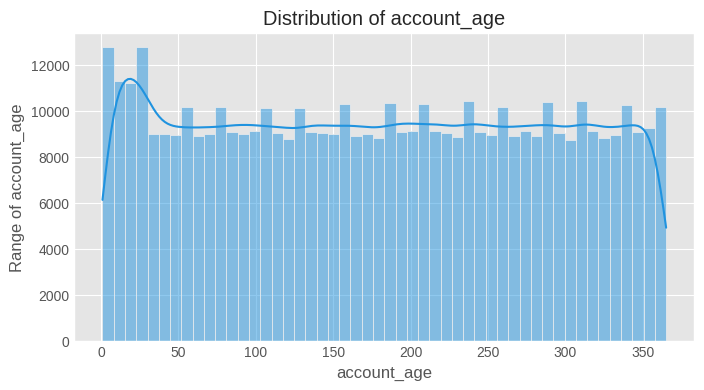

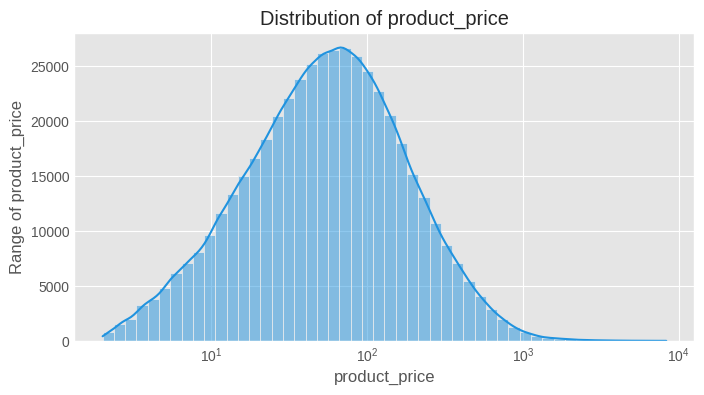

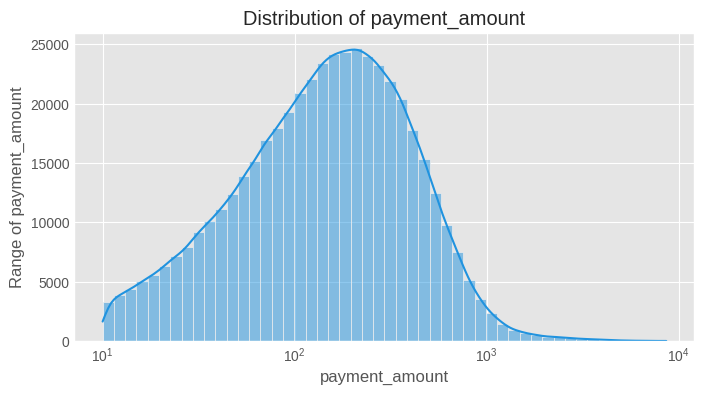

In [9]:
histplot_drawing(df_copy, 'age', bins=63)

histplot_drawing(df_copy, 'account_age', bins=50)

histplot_drawing(df_copy, 'product_price', bins=50, log_scale=(True, False))

histplot_drawing(df_copy, 'payment_amount', bins=50, log_scale=(True, False))

Nhận xét chung:
- Sự phân bố của dữ liệu về độ tuổi (Age) và giá sản phẩm (Product Price) được phân bố khá cân xứng
- Độ tuổi của tài khoản người dùng được trải đều với đỉnh hơi thiên ở phía từ 0 - 25 ngày
- Biểu đồ trực quan cho thấy dữ liệu của 'payment_amount' và 'product_price' sẽ được phân bố cân xứng khi sủ dụng 'log_scale'

### Tổng kết

Dựa trên biểu đồ Histogram và biểu đồ Box, một số góc nhìn có thể được rút ra:
- Sự phân bố (distribution) và độ trải (asymetry) dữ liệu của tất cả các biến số trên biểu đồ phản ánh rằng những miêu tả được đúc kết từ bảng tóm lược số liệu (summary table) là đúng
- Với feature 'account_age', chỉ số chênh lệch giữa Mean và Standard Deviation cùng min/max cho thấy dữ liệu có nhiều điểm tập trung Thêm vào đó là chỉ số kurtosis âm, thể hiện sự bằng phẳng. Khi trực quan hóa, biểu đồ Histogram đã chứng minh rõ hơn khi 0 - 25 là điểm tập trung chính, còn lại từ 50 đến max được trải đều. Dữ liệu không bị skew vì sự chênh lệch khi trực quan hóa diễn ra có thể do nhiều yếu tố tác động, chỉ số skew của trường cũng nằm ở mức lý tưởng (~0.014)
- Hai trường 'product_price' và 'payment_amount' được biểu diễn tốt hơn sau khi sử dụng 'log_scale'. Điều này là hoàn toàn bình thường và gần với hiện thực, khi hai trường này thường có mức độ và quy mô trải rộng về giá trị của từng dữ liệu. Trường 'product_price' chịu tác động từ sự đa dạng về sản phẩm, danh mục và mức giá của sản phẩm và từ đó tác động lên trường 'payment_amount', ngoài ra còn là sự đa dạng về nhu cầu của khách hàng và những yếu tố thị trường. Tất cả những yếu tố đã nêu khiến dữ liệu của hai trường thường có những sự biến động lớn
- Trường 'age' xuất hiện nhiều outlier dương, sau khi trực quan hóa giá trị của feature dù có xu hướng lệch phải, nhưng vẫn nằm trong tầm thông số lý tưởng và gần với thực tế
- Khi được standardize, 'product_price' và 'payment_amount' sẽ có độ trải lý tưởng cho mô hình.

**4. Bivariate**

In [10]:
def violinplot_drawing(dataframe: object, 
                       categorical_column: str, 
                       numerical_column: str, 
                       title: str, 
                       log_scale=None) -> object:
    plt.figure(figsize=(7, 4))
    plt.style.use('seaborn-v0_8-darkgrid')
    sns.violinplot(data=dataframe, 
                   x=dataframe[categorical_column], 
                   y=dataframe[numerical_column], 
                   color='#EC9CC8', 
                   inner_kws=dict(box_width=5, whis_width=2),
                   log_scale=log_scale)
    plt.axhline(dataframe[numerical_column].median(), color='red', linestyle='--', linewidth=1)
    plt.title(title)
    plt.xlabel(categorical_column)
    plt.ylabel(numerical_column)
    plt.tight_layout()
    plt.show()

**5. Age**

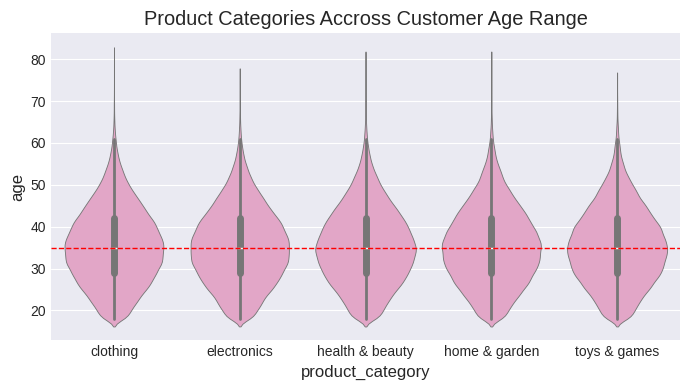

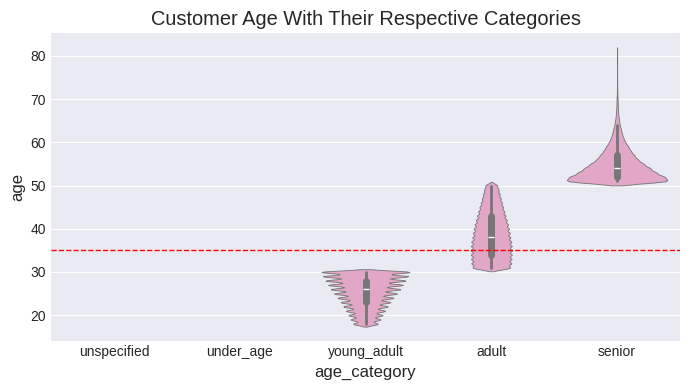

In [11]:
violinplot_drawing(df_copy, 'product_category', 'age', 'Product Categories Accross Customer Age Range')

violinplot_drawing(df_copy, 'age_category', 'age', 'Customer Age With Their Respective Categories')

Customer Age và Product Categories:
- Độ tuổi trung bình của toàn bộ khách hàng tham gia mua sắm ở tất cả các phân loại sản phẩm gần như đồng nhất với độ tuổi trung bình của toàn bộ khách hàng.
- Dữ liệu được trải đều và cân đối, cụ thể hơn thông qua việc độ tuổi tham gia mua sắm phổ biến nhất là 18 - ~50 tuổi ở toàn bộ các danh mục thể loại hàng hóa.
- Tất cả các danh mục đều có outlier dương.

Customer Age và Age Categories:
- Phân loại 'young_adult' và 'adult' không chứa quá nhiều outlier dù cả hai đều có thiên hướng hơi lệch.
- Phân loại 'senior' bị lệch nhiều về phía đuôi (~50 tuổi) nhưng nhìn chung vẫn sát với thực tế và con số độ tuổi lớn nhất không bị lỗi logic so với tuổi thọ thực tế.

**6. Account Age**

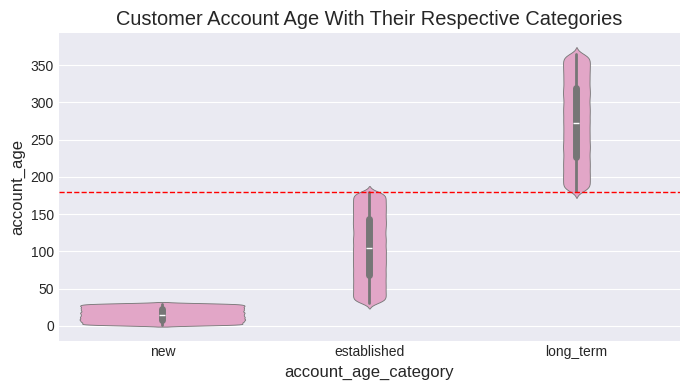

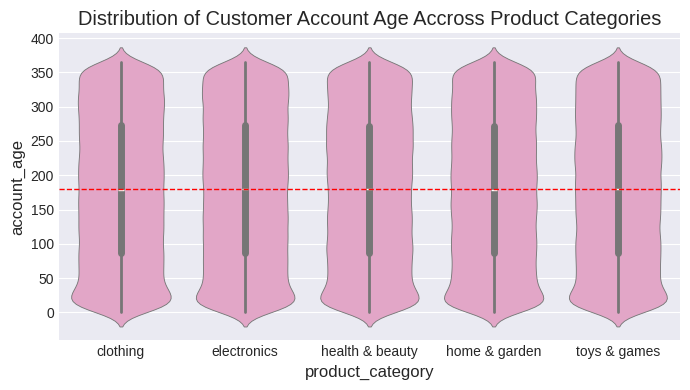

In [12]:
violinplot_drawing(df_copy, 'account_age_category', 'account_age', 'Customer Account Age With Their Respective Categories')

violinplot_drawing(df_copy, 'product_category', 'account_age', 'Distribution of Customer Account Age Accross Product Categories')

Account Age và Age Categories
- Dữ liệu ở từng phân loại đuọc trải đều và liên tiếp với người dùng mới chiếm đa số
- Gần như không có outlier vì tầm giá trị của trường được dán nhãn nối tiếp nhau

Account Age và Product Categories
- Sự phổ biến của các tài khoản mới được phản ánh thông qua mối quan hệ giữa hai trường, khi số lượng tài khoản mới chiếm số lượng nhiều nhất
- Ở tất cả các danh mục hàng hóa, ngoài các tài khoản được tạo từ 1 - ~360 ngày, không có dấu hiệu lệch dữ liệu và giá trị cao hoặc thấp bất thường - trong toàn bộ các danh mục, không có danh mục nào bị chi phối bởi một tầm độ tuổi tài khoản cụ thể

**7. Product Price**

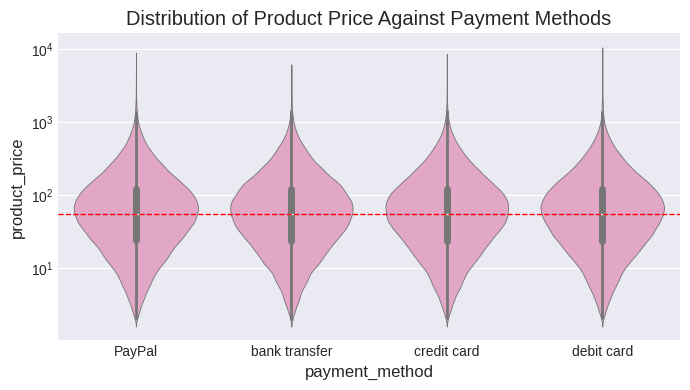

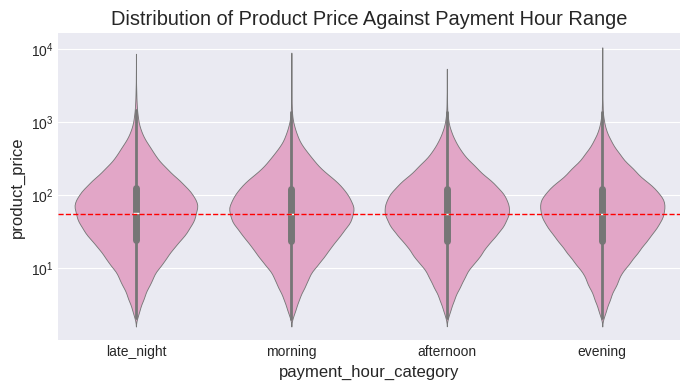

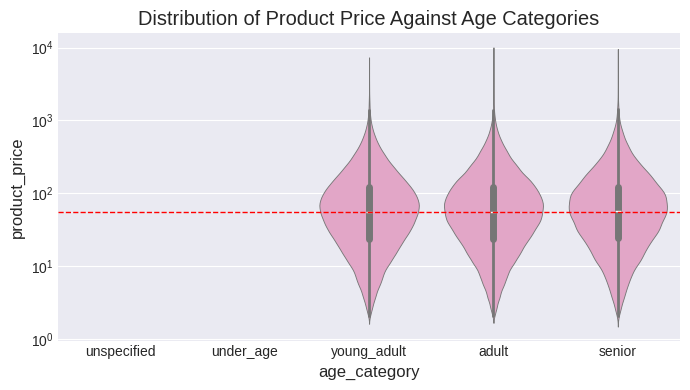

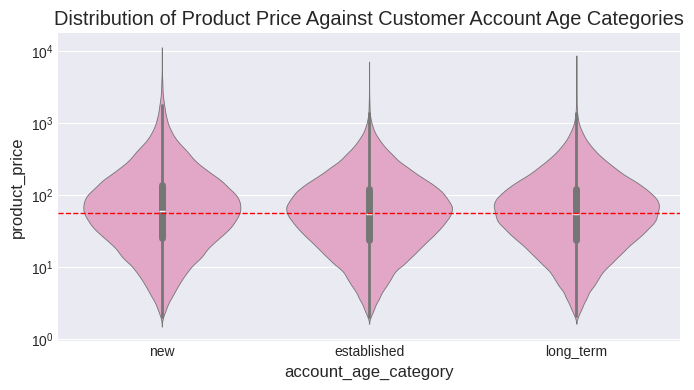

In [13]:
violinplot_drawing(df_copy, 'payment_method', 'product_price', 'Distribution of Product Price Against Payment Methods', log_scale=(False, True))

violinplot_drawing(df_copy, 'payment_hour_category', 'product_price', 'Distribution of Product Price Against Payment Hour Range', log_scale=(False, True))

violinplot_drawing(df_copy, 'age_category', 'product_price', 'Distribution of Product Price Against Age Categories', log_scale=(False, True))

violinplot_drawing(df_copy, 'account_age_category', 'product_price', 'Distribution of Product Price Against Customer Account Age Categories', log_scale=(False, True))

Phương thức thanh toán ('payment_method'), khung thời gian giao dịch ('payment_hour_category'), độ tuổi ('age_category'), tuổi thọ của tài khoản ('account_age_category') không có sự ảnh hưởng qua lại quá lớn với giá thành sản phẩm ('product_price'). Bằng chứng nằm ở việc với mỗi danh mục của từng phân loại (category), dữ liệu về giá cả được phân bổ đều với mức giá phổ biến nằm ở tầm 5 - 500 USD và median cho từng biểu đồ ở mỗi danh mục phân loại gần như đồng nhất với median của trường 'product_price'.

Phương thức thanh toán và khung thời gian giao dịch, cùng độ tuổi (không kể những trường bị sai logic và nghiệp vụ) gần như có độ trải tương đương nhau. Điểm khác biệt là sự phân bố outlier: 
- Phương thức thanh toán có 'bank transfer' có giá trị outlier thấp nhất
- Tất cả các khung thời gian đều chứa outlier, và 'evening' có giá trị thấp hơn những khung thời gian còn lại
- Loại trừ 'unspecified' và 'under_age', phân phối outlier nhiều nhất ở 'adult' nhưng sự chênh lệch về số lượng không mấy đáng kể
- Với tuổi thọ tài khoản, những tài khoản 'new' có xu hướng mua sản phẩm giá thành cao hơn so với 'established' và 'long_term'

Sự phân bố đều về dữ liệu và gần như mọi feature đều chứa outlier thể hiện tiềm năng và sự đa dạng về  đặc trưng gian lận (fraud pattern), đồng thời là sự ổn định về độ trải của dữ liệu để huấn luyện model.

**8. Ordered Quantity**

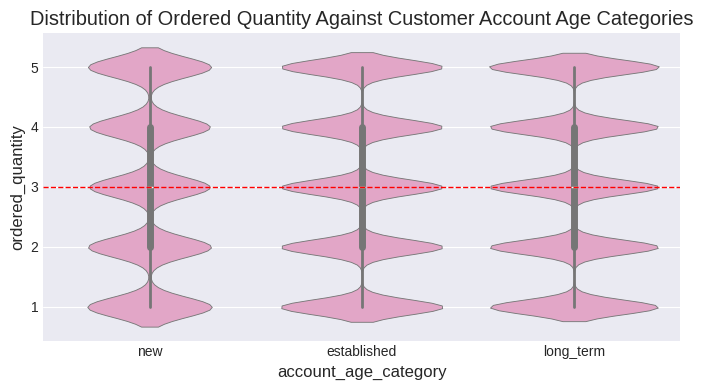

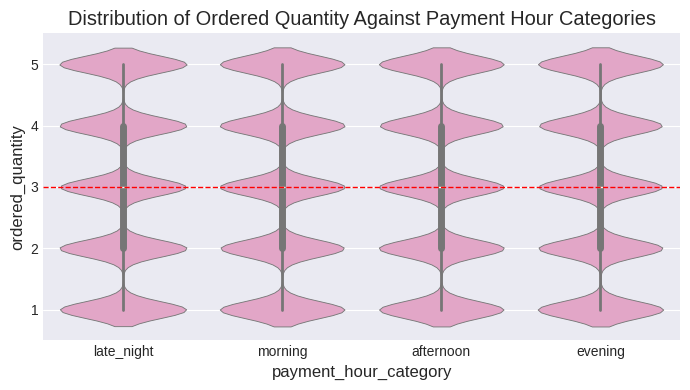

In [14]:
violinplot_drawing(df_copy, 'account_age_category', 'ordered_quantity', 'Distribution of Ordered Quantity Against Customer Account Age Categories')

violinplot_drawing(df_copy, 'payment_hour_category', 'ordered_quantity', 'Distribution of Ordered Quantity Against Payment Hour Categories')

**9. Payment Amount**

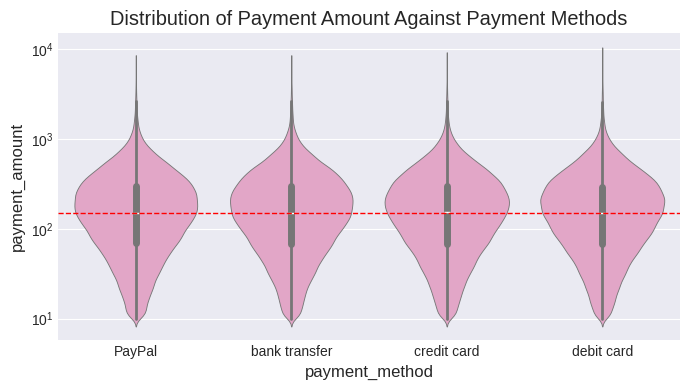

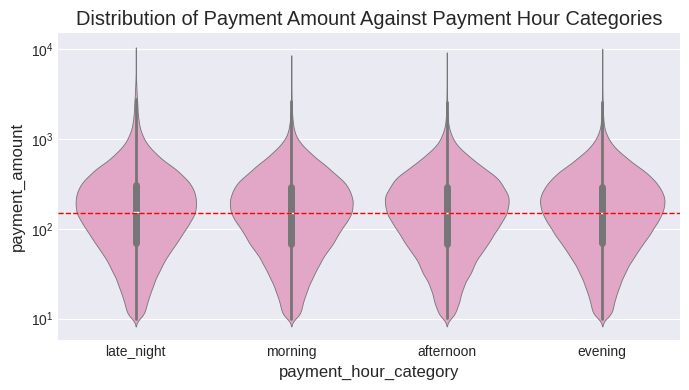

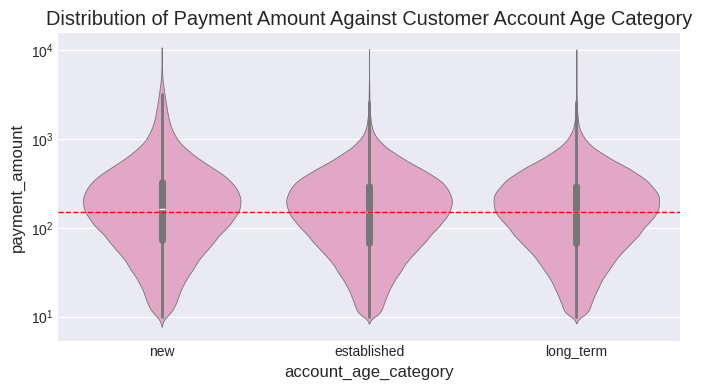

In [15]:
violinplot_drawing(df_copy, 'payment_method', 'payment_amount', 'Distribution of Payment Amount Against Payment Methods', log_scale=(False, True))

violinplot_drawing(df_copy, 'payment_hour_category', 'payment_amount', 'Distribution of Payment Amount Against Payment Hour Categories', log_scale=(False, True))

violinplot_drawing(df_copy, 'account_age_category', 'payment_amount', 'Distribution of Payment Amount Against Customer Account Age Category', log_scale=(False, True))

### Tổng hợp vấn đề

Sau quá trình EDA, một số vấn đề về số liệu và thống kê đã được phát hiện. Sau đây là giải pháp đề xuất:
- Vì **log_scale** có hiệu quả tích cực lên độ trải của các feature ***'product_price'*** và ***'payment_account'***, **chuyển hóa log** sẽ được áp dụng lên các trường này và sau đó sử dụng chuyển hóa **z-score** để chuẩn hóa dữ liệu
- Phân tách feature ***'timestamp'***
- Mã hóa các trường phân loại
- Điều chỉnh format cho dữ liệu của ***'product_category'*** và ***'payment_method'***
- Tách ***'shipping_address'*** và ***'billing_address'*** thành street, city, country tương ứng với hai trường
- Xác định và loại bỏ các feature không cần thiết sau khi đã hoàn tất xử lý

## **5. Chuẩn bị dữ liệu (data preparation)**

**1. Phân tách 'shipping_address' và 'billing_address'**

In [16]:
def address_splitting(address: str):
    parts = address.split(', ')

    if len(parts) >= 3:
        street = parts[-4]
        city = parts[-3]
        province = parts[-2]
        country = parts[-1]
    elif len(parts) == 2:
        city = parts[-2]
        province = parts[-1]
        country = None
    else:
        city = province = country = None

    return pd.Series([street, city, province, country])

In [17]:
df_copy[['shipping_street', 'shipping_city', 'shipping_province', 'shipping_country']] = df_copy['shipping_address'].apply(address_splitting)

df_copy[['billing_street', 'billing_city', 'billing_province', 'billing_country']] = df_copy['billing_address'].apply(address_splitting)

**2. Phân tách và xử lý 'timestamp'**

In [18]:
df_copy['second_of_minute'] = df_copy['timestamp'].dt.second

df_copy['minute_of_hour'] = df_copy['timestamp'].dt.minute

df_copy['day_of_week'] = df_copy['timestamp'].dt.dayofweek

df_copy['month_of_year'] = df_copy['timestamp'].dt.month

df_copy['shipping_country'] = df_copy['billing_country'].astype('string')
df_copy['shipping_city'] = df_copy['billing_city'].astype('string')
df_copy['shipping_province'] = df_copy['billing_province'].astype('string')

In [19]:
df_copy = df_copy.sort_values(by='timestamp').reset_index(drop=True)

In [20]:
df_copy['is_weekend'] = 1

df_copy['is_weekend'] = df_copy['is_weekend'].where((df_copy['day_of_week'] == 5) | (df_copy['day_of_week'] == 6), 0)

In [21]:
df_copy['second_sin'] = np.sin(2 * np.pi * df_copy['second_of_minute'] / 60)
df_copy['second_cos'] = np.cos(2 * np.pi * df_copy['second_of_minute'] / 60)

In [22]:
df_copy['minute_sin'] = np.sin(2 * np.pi * df_copy['minute_of_hour'] / 60)
df_copy['minute_cos'] = np.cos(2 * np.pi * df_copy['minute_of_hour'] / 60)

In [23]:
df_copy['hour_sin'] = np.sin(2 * np.pi * df_copy['payment_hour'] / 24)
df_copy['hour_cos'] = np.cos(2 * np.pi * df_copy['payment_hour'] / 24)

In [24]:
df_copy['day_sin'] = np.sin(2 * np.pi * df_copy['day_of_week'] / 7)
df_copy['day_cos'] = np.cos(2 * np.pi * df_copy['day_of_week'] / 7)

In [25]:
df_copy['month_sin'] = np.sin(2 * np.pi * df_copy['month_of_year'] / 12)
df_copy['month_cos'] = np.cos(2 * np.pi * df_copy['month_of_year'] / 12)

**3. Tách bộ dữ liệu thành train/test/validate sets**

In [27]:
# 70:15:15 ratio
dataset_total_len = len(df_copy)
train_end_idx = int(dataset_total_len * 0.7)
validation_end_idx = int(dataset_total_len * 0.85)

X_train = df_copy.iloc[:train_end_idx]
X_validate = df_copy.iloc[train_end_idx:validation_end_idx]
X_test = df_copy.iloc[validation_end_idx:]

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Validating set: {X_validate.shape}")

Training set: (334480, 43)
Testing set: (71675, 43)
Validating set: (71674, 43)


**4. Áp dụng Power Transformation (Yeo-Johnson Transformation)**

In [28]:
transform_features = ['product_price', 'payment_amount']

In [29]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(X_train.loc[:, transform_features])

,method,'yeo-johnson'
,standardize,False
,copy,True


In [30]:
X_train.loc[:, transform_features] = pt.transform(X_train.loc[:, transform_features])
X_validate.loc[:, transform_features] = pt.transform(X_validate.loc[:, transform_features])
X_test.loc[:, transform_features] = pt.transform(X_test.loc[:, transform_features])

**5. Mã hóa những feature phân loại**

### One-hot encoding

In [31]:
X_train_onehot = pd.get_dummies(X_train, columns=['payment_method', 'device_used', 'product_category', 'billing_country', 'shipping_country'])
X_test_onehot = pd.get_dummies(X_test, columns=['payment_method', 'device_used', 'product_category', 'billing_country', 'shipping_country'])
X_validate_onehot = pd.get_dummies(X_validate, columns=['payment_method', 'device_used', 'product_category', 'billing_country', 'shipping_country'])

In [32]:
dtype_dict = {
    'is_weekend': 'int32',
    'payment_method_PayPal': 'int32',
    'payment_method_bank transfer': 'int32',
    'payment_method_credit card': 'int32',
    'payment_method_debit card': 'int32',
    'device_used_desktop': 'int32',
    'device_used_mobile': 'int32',
    'device_used_tablet': 'int32',
    'product_category_clothing': 'int32',
    'product_category_electronics': 'int32',
    'product_category_health & beauty': 'int32',
    'product_category_home & garden': 'int32',
    'product_category_toys & games': 'int32',
    'billing_country_Cambodia': 'int32',
    'billing_country_China': 'int32',
    'billing_country_India': 'int32',
    'billing_country_Laos': 'int32',
    'billing_country_South Korea': 'int32',
    'billing_country_Vietnam': 'int32',
    'shipping_country_Cambodia': 'int32',
    'shipping_country_China': 'int32',
    'shipping_country_India': 'int32',
    'shipping_country_Laos': 'int32',
    'shipping_country_South Korea': 'int32',
    'shipping_country_Vietnam': 'int32'
}

In [33]:
X_train_encode = X_train_onehot.astype(dtype_dict)
X_validate_encode = X_validate_onehot.astype(dtype_dict)
X_test_encode = X_test_onehot.astype(dtype_dict)

### Frequency encoding

In [34]:
frequency_map_billing_province = X_train_encode['billing_province'].value_counts(normalize=True).to_dict()
frequency_map_shipping_province = X_train_encode['shipping_province'].value_counts(normalize=True).to_dict()

X_train_encode['encoded_billing_province'] = X_train_encode['billing_province'].map(frequency_map_billing_province)
X_train_encode['encoded_shipping_province'] = X_train_encode['shipping_province'].map(frequency_map_billing_province)

X_validate_encode['encoded_billing_province'] = X_validate_encode['billing_province'].map(frequency_map_billing_province)
X_validate_encode['encoded_shipping_province'] = X_validate_encode['shipping_province'].map(frequency_map_billing_province)

X_test_encode['encoded_billing_province'] = X_test_encode['billing_province'].map(frequency_map_billing_province)
X_test_encode['encoded_shipping_province'] = X_test_encode['shipping_province'].map(frequency_map_billing_province)

In [35]:
frequency_map_billing_city = X_train_encode['billing_city'].value_counts(normalize=True).to_dict()
frequency_map_shipping_city = X_train_encode['shipping_city'].value_counts(normalize=True).to_dict()

X_train_encode['encoded_billing_city'] = X_train_encode['billing_city'].map(frequency_map_billing_city)
X_train_encode['encoded_shipping_city'] = X_train_encode['shipping_city'].map(frequency_map_shipping_city)

X_validate_encode['encoded_billing_city'] = X_validate_encode['billing_city'].map(frequency_map_billing_city)
X_validate_encode['encoded_shipping_city'] = X_validate_encode['shipping_city'].map(frequency_map_shipping_city)

X_test_encode['encoded_billing_city'] = X_test_encode['billing_city'].map(frequency_map_billing_city)
X_test_encode['encoded_shipping_city'] = X_test_encode['shipping_city'].map(frequency_map_shipping_city)

In [36]:
X_validate_encode['encoded_billing_city'] = X_validate_encode['encoded_billing_city'].fillna(0)
X_validate_encode['encoded_shipping_city'] = X_validate_encode['encoded_shipping_city'].fillna(0)
X_test_encode['encoded_billing_city'] = X_test_encode['encoded_billing_city'].fillna(0)
X_test_encode['encoded_shipping_city'] = X_test_encode['encoded_shipping_city'].fillna(0)

X_validate_encode['encoded_billing_province'] = X_validate_encode['encoded_billing_province'].fillna(0)
X_validate_encode['encoded_shipping_province'] = X_validate_encode['encoded_shipping_province'].fillna(0)
X_test_encode['encoded_billing_province'] = X_test_encode['encoded_billing_province'].fillna(0)
X_test_encode['encoded_shipping_province'] = X_test_encode['encoded_shipping_province'].fillna(0)

### Ordinal encoding

In [37]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_features = ['age_category', 'account_age_category', 'payment_hour_category']

categories = [
    ['under_age', 'young_adult', 'adult', 'senior', 'unspecified'],
    ['new', 'established', 'long_term'],
    ['morning', 'afternoon', 'evening', 'late_night']
]

encoder = OrdinalEncoder(categories=categories, 
                         dtype=np.int32, 
                         handle_unknown='use_encoded_value',
                         unknown_value=-1)

# Fit the encoder to the original training set
encoder.fit(X_train_encode[ordinal_features])

# Copy the original training/validating/testing data
X_train_encoded = X_train_encode.copy()
X_validate_encoded = X_validate_encode.copy()
X_test_encoded = X_test_encode.copy()

# Transform the training set
X_train_encoded[ordinal_features] = encoder.transform(X_train_encode[ordinal_features])

# Transform the validating set
X_validate_encoded[ordinal_features] = encoder.transform(X_validate_encode[ordinal_features])

# Transform the testing set
X_test_encoded[ordinal_features] = encoder.transform(X_test_encoded[ordinal_features])

## **6. Tạo feature khác biệt về địa chỉ**

In [38]:
X_train_encoded['street_is_different'] = (
    (X_train_encoded['shipping_street'] != X_train_encoded['billing_street']).astype(int)
)

X_train_encoded['province_is_different'] = (
    (X_train_encoded['shipping_province'] != X_train_encoded['billing_province']).astype(int)
)

In [39]:
X_validate_encoded['street_is_different'] = (
    (X_validate_encoded['shipping_street'] != X_validate_encoded['billing_street']).astype(int)
)

X_validate_encoded['province_is_different'] = (
    (X_validate_encoded['shipping_province'] != X_validate_encoded['billing_province']).astype(int)
)

In [40]:
X_test_encoded['street_is_different'] = (
    (X_test_encoded['shipping_street'] != X_test_encoded['billing_street']).astype(int)
)

X_test_encoded['province_is_different'] = (
    (X_test_encoded['shipping_province'] != X_test_encoded['billing_province']).astype(int)
)

## **7. Lược bỏ feature**

In [41]:
features_drop = [
    'customerID', 
    'first_name', 
    'middle_name', 
    'last_name', 
    'ip_address',
    'billing_address',
    'billing_city',
    'billing_province',
    'shipping_address',
    'shipping_city',
    'shipping_province',
    'payment_hour',
    'day_of_week',
    'month_of_year',
    'timestamp',
    'shipping_street',
    'billing_street',
    'second_of_minute',
    'minute_of_hour'
]

In [42]:
X_train_feature_dropped = X_train_encoded.drop(features_drop, axis=1)
X_validate_feature_dropped = X_validate_encoded.drop(features_drop, axis=1)
X_test_feature_dropped = X_test_encoded.drop(features_drop, axis=1)

## **8. Chuẩn hóa các feature**

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

scale_features = ['age', 'account_age', 'product_price', 'ordered_quantity', 'payment_amount']

preprocessor = ColumnTransformer(
    transformers=[
        ('scaled', StandardScaler(), scale_features)
    ],
    remainder='passthrough'
)

train_scaled = preprocessor.fit_transform(X_train_feature_dropped)
validate_scaled = preprocessor.transform(X_validate_feature_dropped)
test_scaled = preprocessor.transform(X_test_feature_dropped)

column_names = preprocessor.get_feature_names_out()

X_train = pd.DataFrame(train_scaled, columns=column_names)
X_validate = pd.DataFrame(validate_scaled, columns=column_names)
X_test = pd.DataFrame(test_scaled, columns=column_names)

## **9. Min-Max scaler**

In [44]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

X_train_scaled = mm_scaler.fit_transform(X_train)
X_validate_scaled = mm_scaler.transform(X_validate)
X_test_scaled = mm_scaler.transform(X_test)

In [45]:
X_train = pd.DataFrame(X_train_scaled, columns=column_names)
X_validate = pd.DataFrame(X_validate_scaled, columns=column_names)
X_test = pd.DataFrame(X_test_scaled, columns=column_names)

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334480 entries, 0 to 334479
Data columns (total 49 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   scaled__age                                  334480 non-null  float64
 1   scaled__account_age                          334480 non-null  float64
 2   scaled__product_price                        334480 non-null  float64
 3   scaled__ordered_quantity                     334480 non-null  float64
 4   scaled__payment_amount                       334480 non-null  float64
 5   remainder__age_category                      334480 non-null  float64
 6   remainder__account_age_category              334480 non-null  float64
 7   remainder__payment_hour_category             334480 non-null  float64
 8   remainder__is_weekend                        334480 non-null  float64
 9   remainder__second_sin                        334480 non-nul

In [48]:
del X_train_encode
del X_train_onehot
del X_train_encoded
del X_train_feature_dropped

del X_test_encode
del X_test_onehot
del X_test_encoded
del X_test_feature_dropped

del X_validate_encode
del X_validate_onehot
del X_validate_encoded
del X_validate_feature_dropped

gc.collect()

158